### *RAMP starting kit*

# Get the best personal beer recommendation

<i>Philippe Burgelin, Côme Cothenet, Gauthier Perrod, Manuel Pichon</i>

## Index

## Introduction

Recommender systems are everywhere nowadays. From Netflix to Amazon through retail, people are interested in applications that help them find products they are susceptible to like and close to their interests. While some subjects like entertainment have cutting edge technology for recommendation, some others could be developed more and more.
With the fast growing of technologies, digital contents are more and more accessible. On some platforms, it is possible to have access to a wide variety of media, without paying much. Users know there surely exists a music playlist they would love, nevertheless they can be lost in this never ending world. This the reason why recommender systems are useful : the platform knows than ourself what we love.
As an example of useful recommender system, we could cite Spotify, that dethroned Deezer into music streaming, thanks first to the wide available music, but also and principally thanks to its nice working recommender system. They developed three recommendation models : Collaborative filtering, Natural Language Processing and Raw Audio Models. 
Concerning drink business, recommender systems for wine has a hard competition. It is due to the efficiency of the measures of wine quality, that are objective. This is not the case with beer. However, beer lovers have developed in Europa and America. The production has neatly increased, and it has also grown in quality. Young students appreciate beer for its cheapness for parties, democratized by American movies, but young adults prefer original beers, crafted, or even brewed by hand. The annual beer consummation in the world is 203 100 000 000 liters each years (yes, there is no mistake here, over 203 billion liters), enough to fill 81 240 Olympic pools with beer.
From this idea the objective of this subject is to predict the taste of people for certain beer from the data of past graded beer, since objective measures are not available.

## Getting started with the RAMP startting kit

### Software prerequisites

### Loading the data

## The data

### Overview

The dataset we provide has been crawled from the website https://www.ratebeer.com. This site is known as one of the first beer notation site. Users from all around the world comment and note precisely beers. The crawling was made thanks to GraphQL and Scrappy (Python's library). This crawling allowed us to get three datatypes, according the following feature structure :
* __**Information about user**__ :
    * **authorId**
    * **users Surname** : We will not keep this feature since we want to try to pseudonimize users as much as possible.
    * **authorReviewCOunt** : number of notation in the entire site. It doesn't reflect our database since we didn't crawl the whole website for legal reasons.
<p>
* __**Information about beers**__ : 
    * **abv** : the alcohol degree of the beer.
    * **averageRating** : the average note of the beer.
    * **brewerId** : the Id of the Brewer. This could help to predict the quality of the beer, since brewers have their own expertise that influence the taste of beers
    * **calories** : this is calculated by ratebeer as a direct proportion of the degree.
    * **IBU** : this corresponds to the bitterness of the beer. Only a few beers have a noted IBU. This is typically a measure that we miss in order to do some content-based filtering.
    * **ratingCount** : number of users that have noted this beer.
    * **styleId** : style of the beer, this can help a lot to predict the note, since a Stout is neatly different than a Lager.
    * **styleScore** : score of the beer relative to all the beers in the same style.
<p>
* <u>**Information about rating**</u> (more than 600,000) :
    * **authorId** : id of the taster.
    * **score** : true notation of the beer.
    * **scoresAppearance**, **scoresAroma**, **scoresFlavor**, **scoresMouthfeel**, **scoresOverall** : notations of some detailed impressions of the user. scoresOverall is the total score of these detailed notations.

<p>
We could improve easily our dataset with more scrapping on https://www.beerhawk.co.uk, https://www.saveur-biere.com or https://craftshack.com/collections/new-additions as a few examples on the web.

The collection cost was about 3.5 working days in order to find the correct solution, exploitable and reusable. Doing it with many websites doesn't scale linearly. Once the methodology is defined, it is much easier to scrape other sites, under the condition that they are not protected against scrapping. In this case, we would need to use Selenium (Python's library).

In order to increase the prediction score, we may need more information about content. Details about ingredients or objective measures like IBU (International Bitterness Unit) or SRM (Standard Reference Method - base of color measures) could lead to content-based filtering.

Some other data could come from shops' prices. In this way, it would be easier to study price elasticity, and consider a correlation in order to be more aggressive on the market.

### Exploratory Data Analysis

### Data visualization

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
files = pd.read_csv('full.csv')

#### file
First we open the files to see all the variable defined above.

In [2]:
files.head()

,Unnamed: 0,authorId,beerId,styleId,brewerId,abv,brewerName,beerName,mean_rating,rating
0,0,21543,451,118.0,799.0,8.0,La Trappe Trappist - Abdij O.L.V. Koningshoeve...,La Trappe Isid'or,3.741069,4.4
1,1,92269,451,118.0,799.0,8.0,La Trappe Trappist - Abdij O.L.V. Koningshoeve...,La Trappe Isid'or,3.741069,4.1
2,2,11041,451,118.0,799.0,8.0,La Trappe Trappist - Abdij O.L.V. Koningshoeve...,La Trappe Isid'or,3.741069,4.0
3,3,31108,451,118.0,799.0,8.0,La Trappe Trappist - Abdij O.L.V. Koningshoeve...,La Trappe Isid'or,3.741069,4.0
4,4,14970,451,118.0,799.0,8.0,La Trappe Trappist - Abdij O.L.V. Koningshoeve...,La Trappe Isid'or,3.741069,3.8


#### rate spreading
We first try to see how the grades are spread. We see that most of the grades are beetween 2.5 and 4.5 

<BarContainer object of 46 artists>

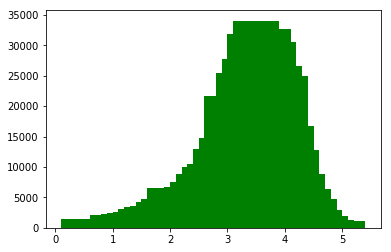

In [14]:
meanrating = files.groupby(['rating']).count()
plt.bar(pd.DataFrame(meanrating).index.values,pd.DataFrame(meanrating)["Unnamed: 0"], color="green")

#### a few satistic about beer

we try to see how different aspect of the beer impact the rating

In [4]:
meanratingbybere = pd.DataFrame(files.groupby(['beerId'])["rating"].mean())
meanabvbybere = pd.DataFrame(files.groupby(['beerId'])["abv"].mean())
meanratingbybere = meanratingbybere.rename(columns={"rating":"Meanrat"})
meanabvbybere = meanabvbybere.rename(columns={"abv":"Meanabv"})
joined = files.join(meanratingbybere)
joinedabvrat = joined.join(meanabvbybere)
meanstylebybere = pd.DataFrame(files.groupby(['beerId'])["styleId"].mean())
meanstylebybere = meanstylebybere.rename(columns={"styleId":"Meanstyle"})
joined = files.join(meanratingbybere)
meanstylerat = joined.join(meanstylebybere)

Text(0, 0.5, 'rating')

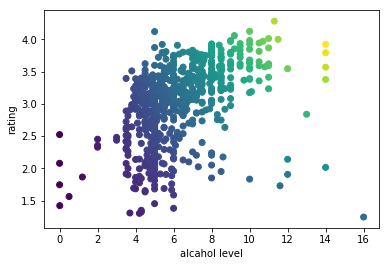

In [5]:
plt.scatter(joinedabvrat["Meanabv"],joinedabvrat["Meanrat"], c=joinedabvrat["Meanrat"]*joinedabvrat["Meanabv"], cmap= plt.cm.get_cmap('viridis'))
plt.xlabel("alcahol level")
plt.ylabel("rating")

Text(0, 0.5, 'rating')

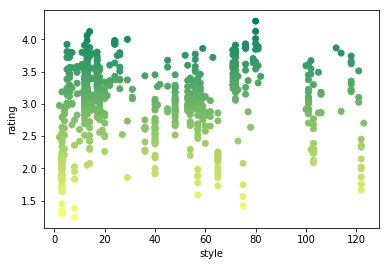

In [6]:
plt.scatter(meanstylerat["Meanstyle"],meanstylerat["Meanrat"], c=joinedabvrat["Meanrat"], cmap= plt.cm.get_cmap('summer_r'))
plt.xlabel("style")
plt.ylabel("rating")

#### a few satistic about brewer

we try to see how different aspect of the brewer impact the rating

In [7]:
meanratingbrewer = pd.DataFrame(files.groupby(['brewerId'])["rating"].mean())
meanratingbrewer = meanratingbrewer.rename(columns={"rating":"Meanratbrewer"})
numbeerbrewer = pd.DataFrame(files.groupby(['brewerId'])["beerId"].nunique())
numbeerbrewer = numbeerbrewer.rename(columns={"beerId":"diferentbeer"})
meanratingbrewer = meanratingbrewer.join(numbeerbrewer)

Text(0, 0.5, 'rating')

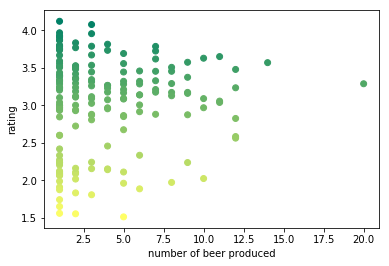

In [8]:
plt.scatter(meanratingbrewer["diferentbeer"],meanratingbrewer["Meanratbrewer"], c=meanratingbrewer["Meanratbrewer"], cmap= plt.cm.get_cmap('summer_r') )
plt.xlabel("number of beer produced")
plt.ylabel("rating")

### Train and test datasets

## Evaluation 

### KPI definition

First of all, we want to predict the note that a user would give to a beer. That means we would like to know what note would every user give to every beer. The predicted note goes from 0 - the user hates the beer- to 5 - the user loves the beer. 

As an  example of KPI, considering a beer seller on internet, the more the beers they propose are adapted to the buyer, the more the buyer would come back and try new beers. This is a quite obvious KPI for this type of company.
Since it is a quite new trend, it would be interesting to detect evolution of tastes through time and space. This would correspond to a science problem concerning the zythology.

### Metrics choice

The most crucial information for us would be to give the correct approximation of the grade. The quantitative score would so be the **RMSE**. The closer the predicted note is to the real note, the better is the model. The best measure for our model would so be the RMSE. This measure helps us to "punish" the large residuals.

### Expected relationship between metrics and KPI

As far as a better score gives a better buyer experience, a bad score would not decrease symmetrically. In fact, because we do not force the user to buy the beer we suggest to him, he can not be totaly disappointed by the seller. However, this would not make the shop better than its competitors and it would lead to a loss of market. As a comparison, we could cite Deezer and Spotify again : Spotify, thanks to its efficient recommender system, gets more and more subscribers and a "winner takes all" effect can be observed. With more than 92 millions subscribers, a large part of them decided to subscribe in order to discover new musics. As a counterpart, Deezer had a loss of market since Spotify knew best what users look for.

## Predictive workflow

## The pipeline 

### Feature extractor

### Classifier

### Cross-Validation

## Local testing (before submission)